<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [7]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     2
WPI           0
dtype: int64

In [10]:
import numpy as np

pho = df['Phosphate']

for i in range(len(pho)):
    if i>5:
        if np.isnan(pho[i]):
                pho[i] = np.mean([pho[i-1], pho[i-2], pho[i-3], pho[i-4], pho[i-5]])
pho

for i in range(4,-1,-1):
    if np.isnan(pho[i]):
            pho[i] = np.mean([pho[i+1], pho[i+2], pho[i+3], pho[i+4], pho[i+5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [11]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [13]:
df.tail()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
482,7.6,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480,0.015,0.419630
483,7.3,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068,0.033,0.432996
484,5.1,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910,0.163,0.326811
485,7.4,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500,0.219,0.509970
486,7.6,6.9,243.0,68.0,410.8,17.41,82.0,50.0,9.92,1.310,34.89,6.385000,59.940,0.070,0.422551


In [14]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [15]:
normalized_df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,0.876081,0.483871,0.111111,0.271605,0.123267,0.049610,0.227273,0.219512,0.038242,0.075308,0.057554,0.077630,0.055384,0.035190,0.097276
1,0.749280,0.494624,0.214286,0.419753,0.222772,0.139081,0.227273,0.414634,0.168950,0.113962,0.158273,0.019775,0.070853,0.005439,0.075203
2,0.720461,0.354839,0.075397,0.222222,0.074257,0.128250,0.106061,0.219512,0.131279,0.106631,0.158273,0.030360,0.029547,0.007252,0.053492
3,0.893372,0.526882,0.079365,0.296296,0.071782,0.089038,0.227273,0.195122,0.065639,0.112296,0.083453,0.030434,0.013953,0.008703,0.077124
4,0.636888,0.333333,0.111111,0.271605,0.103960,0.071707,0.106061,0.219512,0.063356,0.068644,0.064748,0.010503,0.046370,0.005666,0.041510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.720461,0.150538,0.666667,0.000000,0.673267,0.302210,0.590909,0.268293,0.405251,0.736754,0.276835,0.138785,1.000000,0.008499,0.210614
483,0.634006,0.150538,0.833333,0.543210,0.831683,0.397964,0.621212,0.365854,0.535959,0.496834,0.389353,0.727893,0.581321,0.018697,0.219520
484,0.000000,0.172043,0.928571,0.024691,0.962871,0.761698,0.348485,0.512195,0.816210,0.033322,0.810504,0.952541,0.859482,0.092351,0.148769
485,0.662824,0.236559,0.690476,0.395062,0.710396,0.387132,0.424242,0.487805,0.562215,0.433522,0.418993,0.731644,0.460111,0.124079,0.270807


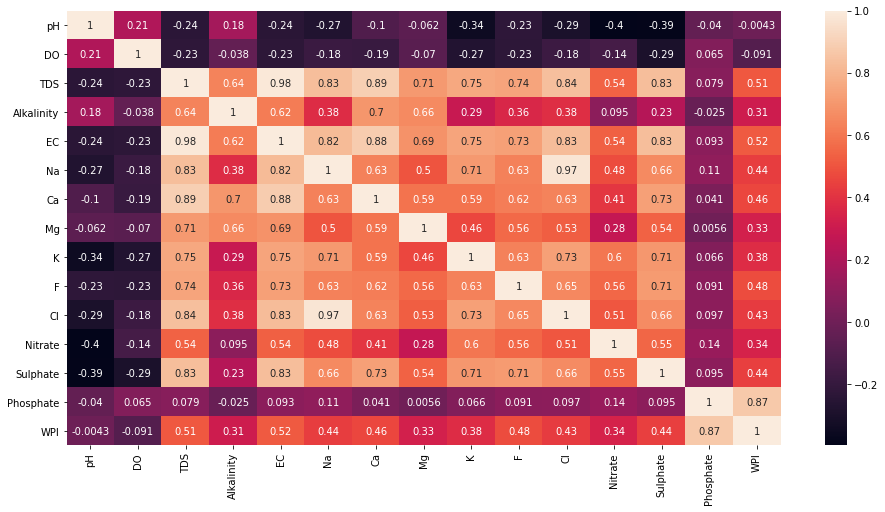

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 8))
sns.heatmap(normalized_df.corr(), annot = True)
plt.show()

In [30]:
normalized_df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [34]:
x = normalized_df.drop('WPI',axis=1)
x.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,0.876081,0.483871,0.111111,0.271605,0.123267,0.049610,0.227273,0.219512,0.038242,0.075308,0.057554,0.077630,0.055384,0.035190
1,0.749280,0.494624,0.214286,0.419753,0.222772,0.139081,0.227273,0.414634,0.168950,0.113962,0.158273,0.019775,0.070853,0.005439
2,0.720461,0.354839,0.075397,0.222222,0.074257,0.128250,0.106061,0.219512,0.131279,0.106631,0.158273,0.030360,0.029547,0.007252
3,0.893372,0.526882,0.079365,0.296296,0.071782,0.089038,0.227273,0.195122,0.065639,0.112296,0.083453,0.030434,0.013953,0.008703
4,0.636888,0.333333,0.111111,0.271605,0.103960,0.071707,0.106061,0.219512,0.063356,0.068644,0.064748,0.010503,0.046370,0.005666


In [39]:
y = normalized_df['WPI']
y.head()

0    0.097276
1    0.075203
2    0.053492
3    0.077124
4    0.041510
Name: WPI, dtype: float64

MLR
Multiple linear regression is a form of linear regression used when there is more than one
predicting variable at play

In [40]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_prediction =  LR.predict(x_test)
y_prediction

array([0.26780792, 0.10976828, 0.097216  , 0.18148955, 0.13327922,
       0.25094018, 0.4424282 , 0.15035981, 0.24367763, 0.12759524,
       0.08954772, 0.20220242, 0.1055206 , 0.11150058, 0.04534676,
       0.07379373, 0.28315527, 0.06633109, 0.19918869, 0.13679542,
       0.10064563, 0.08003358, 0.08031436, 0.1382367 , 0.0414555 ,
       0.08947685, 0.22996734, 0.5372088 , 0.17773195, 0.13540975,
       0.50749867, 0.25499224, 0.15981046, 0.12815714, 0.06986991,
       0.097216  , 0.11566194, 0.2106503 , 0.15295992, 0.40402423,
       0.1070818 , 0.11159724, 0.10693068, 0.24865721, 0.05515217,
       0.09975501, 0.15020451, 0.08338196, 0.10976828, 0.13485258,
       0.06900137, 0.07628456, 0.15843218, 0.13509191, 0.22203892,
       0.09238164, 0.08925567, 0.05648512, 0.07455134, 0.60743287,
       0.09834674, 0.23044669, 0.15473083, 0.05580411, 0.11957517,
       0.07759675, 0.07537406, 0.31211143, 0.26073317, 0.20373699,
       0.09832702, 0.12179393, 0.09689875, 0.1290178 , 0.04737

In [48]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.9999915829896358
mean_sqrd_error is== 9.795137007625089e-08
root_mean_squared error of is== 0.00031297183591539175


In [61]:
print('The shape of our features is:', normalized_df.shape)

The shape of our features is: (487, 15)


In [62]:
# Descriptive statistics for each column
normalized_df.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,0.780771,0.348555,0.237112,0.334728,0.243902,0.145497,0.224877,0.272700,0.144762,0.150881,0.149282,0.132028,0.135017,0.050659,0.126569
std,0.118506,0.119050,0.187635,0.123879,0.200713,0.123909,0.135200,0.131895,0.131518,0.164653,0.133517,0.189301,0.141233,0.088617,0.088208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.708934,0.268817,0.111111,0.259259,0.103960,0.067266,0.136364,0.170732,0.070491,0.063312,0.069433,0.024711,0.045135,0.013241,0.078657
50%,0.795389,0.344086,0.182540,0.296296,0.180693,0.106369,0.196970,0.243902,0.109018,0.084305,0.105036,0.053847,0.083501,0.026205,0.100333
75%,0.864553,0.419355,0.289683,0.395062,0.300743,0.174285,0.287879,0.317073,0.165525,0.136288,0.180872,0.154735,0.166249,0.051558,0.139335
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Random Forest
Random forest is a model that uses multiple base models on subsets of the given data and makes
decisions based on all the models. In random forest, the base model is a decision tree, carrying all the
pros of a decision tree with the additional efficiency of using multiple models

In [63]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [64]:
print('Training X Shape:', train_x.shape)
print('Training Y Shape:', train_y.shape)
print('Testing X Shape:', test_x.shape)
print('Testing Y Shape:', test_y.shape)

Training X Shape: (365, 14)
Training Y Shape: (365,)
Testing X Shape: (122, 14)
Testing Y Shape: (122,)


In [67]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y);

In [68]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [69]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.99 %.


In [72]:
# Labels are the values we want to predict
labels = np.array(normalized_df['WPI'])
# Remove the labels from the features
# axis 1 refers to the columns
features= normalized_df.drop('WPI', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [73]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [75]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_x, train_y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [76]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Phosphate            Importance: 0.67
Variable: TDS                  Importance: 0.11
Variable: F                    Importance: 0.06
Variable: EC                   Importance: 0.04
Variable: DO                   Importance: 0.03
Variable: Ca                   Importance: 0.02
Variable: pH                   Importance: 0.01
Variable: Na                   Importance: 0.01
Variable: K                    Importance: 0.01
Variable: Cl                   Importance: 0.01
Variable: Nitrate              Importance: 0.01
Variable: Sulphate             Importance: 0.01
Variable: Alkalinity           Importance: 0.0
Variable: Mg                   Importance: 0.0


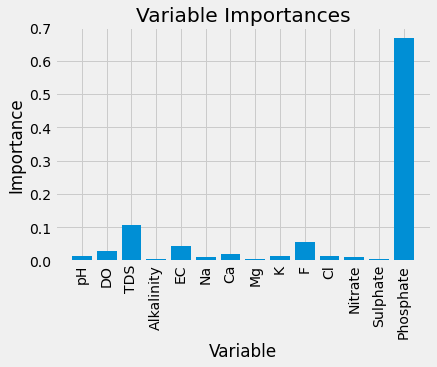

In [79]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
